# Support Vector Machine

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from svm_margin_plot import plot_svm_boundary

In [39]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [40]:
df = pd.read_csv(url)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* survival:	Survival	0 = No, 1 = Yes
* pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex:	Sex	
* Age:	Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	
* parch:	# of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare:	Passenger fare	
* cabin:	Cabin number	
* embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# EDA

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
df.drop("Cabin" , axis=1 , inplace=True)
# Gerekli olmayan veriyi gönderdik


In [45]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

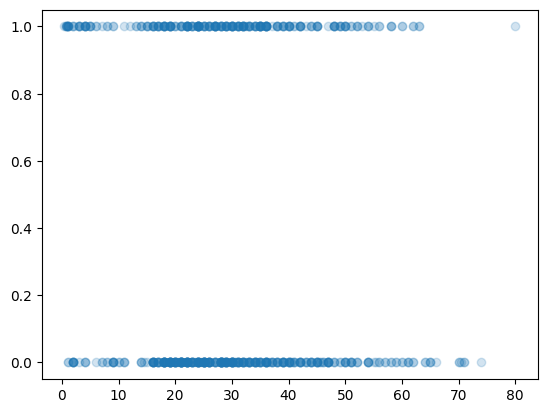

In [46]:
plt.scatter(x="Age" , y="Survived", data=df , alpha=0.2)
# Yaş ve hayatta kalma arasındaki ilişki

In [47]:
df[(df["Age"] > 70 ) & (df["Survived"] == 1)]
# Yaşı 70 den büyük olan ve hayatta kalanlar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


# Hayatta Kalma Oranları

In [48]:
len(df[(df["Age"] < 20) & (df["Survived"] == 1)])

# Yaşın 20 den küçük , hayatta kalanlar

79

In [49]:
len(df[(df["Age"] < 20) & (df["Survived"] == 0)])
# Yaşın 20 den küçük , hayatta kalamayanlar

85

In [50]:
mort = round(len(df[(df["Age"] < 15) & (df["Survived"] == 1)]) / len(df[df["Age"] < 15])*100,2)
print("15 Yaş Altı İnsanların Hayatta Kalma Oranı: %", mort)

15 Yaş Altı İnsanların Hayatta Kalma Oranı: % 57.69


In [51]:
mort = round(len(df[(df["Age"] < 15) & (df["Survived"] == 0)]) / len(df[df["Age"] < 15])*100,2)
print("15 Yaş Altı İnsanların Hayatta Kalmama Oranı: %", mort)

15 Yaş Altı İnsanların Hayatta Kalmama Oranı: % 42.31


In [52]:
len(df[df["Survived"] == 0])

# Ölen insanların verilerinin uzunluğu

549

In [53]:
len(df[df["Survived"] == 1])
# Hayatta kalan verilerin değeri

342

In [54]:
mort2 = round(len(df[df["Survived"] == 1]) / len(df["Survived"]),2)
print("Titanik Hayatta Kalma Oranı: %", mort2*100)

Titanik Hayatta Kalma Oranı: % 38.0


In [55]:
age_na = df[df["Age"].isna()]
age_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [56]:
age_na.value_counts("Survived")

Survived
0    125
1     52
Name: count, dtype: int64

In [57]:
print("Yaşı Belirsizlerin Ölüm Oranı: %", (52/125) * 100)

Yaşı Belirsizlerin Ölüm Oranı: % 41.6


In [58]:
print(len(df))
df.isna().sum()
df = df.dropna()
# Boş olan verileri sildir

891


<Axes: xlabel='Age', ylabel='Pclass'>

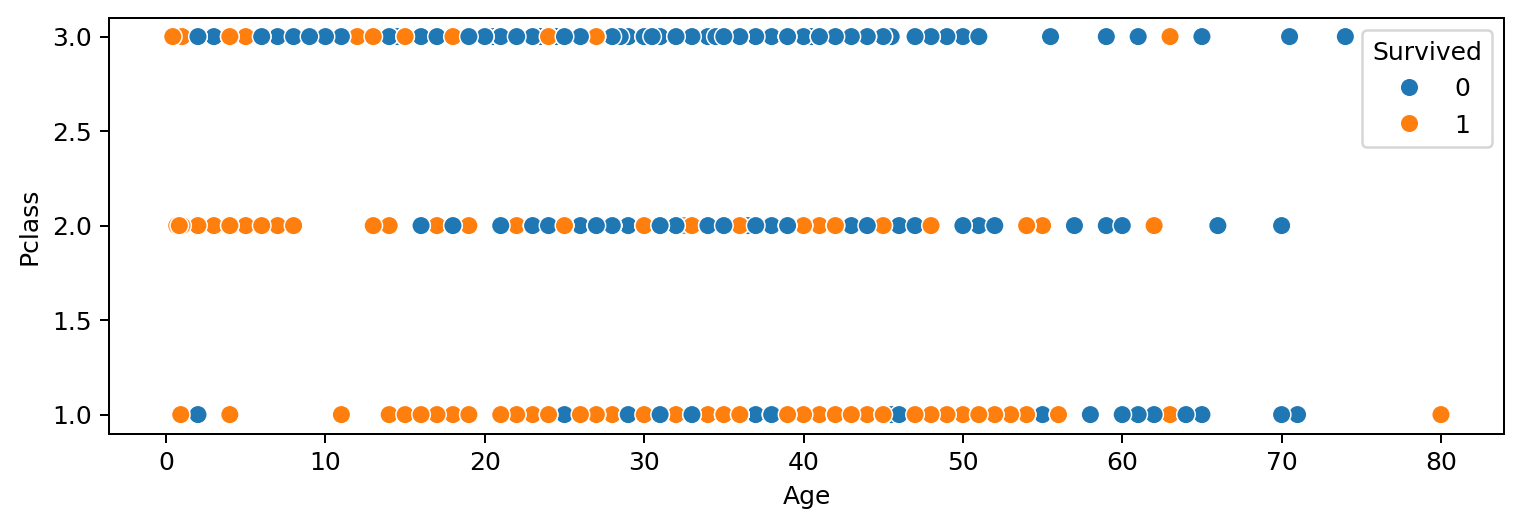

In [59]:
plt.figure(figsize=(10,3), dpi=180)
sns.scatterplot(x="Age", y="Pclass", data=df, hue="Survived", s=55)

# Yaşlara ve kalınan apt kalitesine göre verileri gösterdik

In [60]:
df[["Pclass", "Survived"]].value_counts()
# Kalınan apt klasmanına göre hayatta kalma ya da ölme sayıları

Pclass  Survived
3       0           270
1       1           120
2       0            90
3       1            85
2       1            83
1       0            64
Name: count, dtype: int64

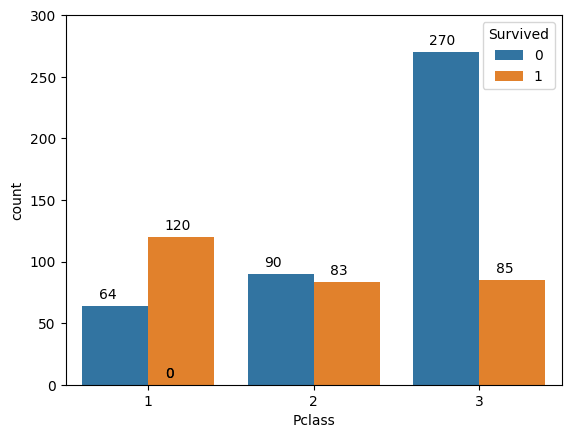

In [ ]:
ax = sns.countplot(x="Pclass", data=df, hue="Survived")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))
plt.ylim(0,300);
# Yolcu sınıfına göre hayatta kalma ve ölüm sayılarının histogramını çiziyoruz.

# Train Test Split

In [62]:
df = df.dropna()
# Boş olan değerleri sil
# Yoksa fit yaparken hata alacaksın

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = df.drop(["PassengerId","Name","Ticket", "Survived"], axis=1)
x = pd.get_dummies(x, drop_first=True)

y = df["Survived"]

In [65]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [66]:
X_train, X_test, y_train, y_test = train_test_split(
  x, y, test_size=0.3, random_state=9)

In [67]:
y_train

401    0
322    1
763    1
769    0
230    1
      ..
74     1
635    1
802    1
436    0
480    0
Name: Survived, Length: 498, dtype: int64

In [68]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
401,3,26.0,0,0,8.0500,True,False,True
322,2,30.0,0,0,12.3500,False,True,False
763,1,36.0,1,2,120.0000,False,False,True
769,3,32.0,0,0,8.3625,True,False,True
230,1,35.0,1,0,83.4750,False,False,True
...,...,...,...,...,...,...,...,...
74,3,32.0,0,0,56.4958,True,False,True
635,2,28.0,0,0,13.0000,False,False,True
802,1,11.0,1,2,120.0000,True,False,True
436,3,21.0,2,2,34.3750,False,False,True


# SVM MODEL

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [70]:
model =SVC()

* SVM de kullanılacak parametreler için GridSearch araması yapalım

In [71]:
C = 10. **np.arange(-2,4)

parameters = {
    "C":C,
    "kernel":["rbf" , "poly"],
    "degree":[2,3,4]
    }

In [72]:
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [73]:
X_train.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [74]:
grid = GridSearchCV(model, parameters, cv=9)
grid.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': [2, 3, 4], 'kernel': ['rbf', 'poly']})

In [ ]:
grid.best_params_
# Grid Search e göre en iyi paramaterler

{'C': np.float64(1000.0), 'degree': 2, 'kernel': 'poly'}

In [76]:
jack = grid.predict(X_test)

In [ ]:
grid.best_score_
# En iyi değer

np.float64(0.7972582972582973)

In [78]:
from grid_plot import GridSearch_table_plot
# Dosyaların içerisinde var 

best parameters: {'C': np.float64(1000.0), 'degree': 2, 'kernel': 'poly'}
best score:      0.79726 (+/-0.02303)
{'C': np.float64(1000.0),
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
31,0.172900,0.125331,0.002338,0.000470,1000.0,2,poly,"{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}",0.821429,0.767857,0.767857,0.818182,0.818182,0.763636,0.800000,0.800000,0.818182,0.797258,0.023026,1
28,0.006389,0.000460,0.002113,0.000315,100.0,4,rbf,"{'C': 100.0, 'degree': 4, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
26,0.006279,0.000415,0.002000,0.000471,100.0,3,rbf,"{'C': 100.0, 'degree': 3, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
24,0.005888,0.000567,0.002391,0.000738,100.0,2,rbf,"{'C': 100.0, 'degree': 2, 'kernel': 'rbf'}",0.785714,0.750000,0.785714,0.800000,0.854545,0.763636,0.872727,0.727273,0.763636,0.789250,0.044804,2
30,0.022777,0.004242,0.002891,0.000566,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
32,0.022668,0.003762,0.002559,0.000497,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
34,0.022597,0.004288,0.002665,0.000471,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.767857,0.732143,0.803571,0.781818,0.800000,0.781818,0.836364,0.763636,0.709091,0.775144,0.035995,5
33,1.244216,0.699283,0.002240,0.000409,1000.0,3,poly,"{'C': 1000.0, 'degree': 3, 'kernel': 'poly'}",0.732143,0.714286,0.732143,0.727273,0.709091,0.654545,0.745455,0.763636,0.654545,0.714791,0.035553,8
18,0.005001,0.000473,0.002223,0.000420,10.0,2,rbf,"{'C': 10.0, 'degree': 2, 'kernel': 'rbf'}",0.696429,0.678571,0.714286,0.672727,0.800000,0.581818,0.800000,0.690909,0.709091,0.704870,0.062662,9
20,0.004942,0.000370,0.002338,0.000470,10.0,3,rbf,"{'C': 10.0, 'degree': 3, 'kernel': 'rbf'}",0.696429,0.678571,0.714286,0.672727,0.800000,0.581818,0.800000,0.690909,0.709091,0.704870,0.062662,9


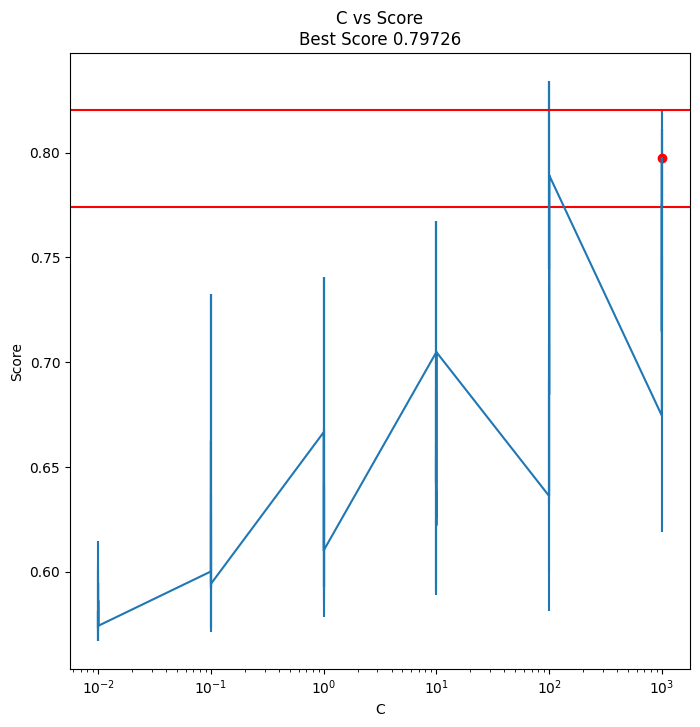

In [79]:
GridSearch_table_plot(grid ,"C" , negative=False)

* Hem poly hem de rbf de değerlendirildiği için zıplamalar gerçekleşti

# Değerlendirme

In [80]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

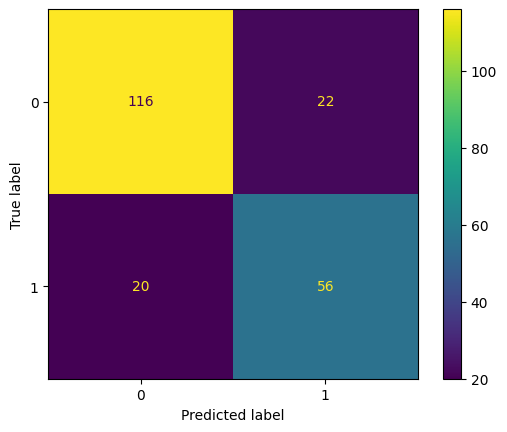

In [81]:
ConfusionMatrixDisplay.from_estimator(grid , X_test , y_test)

In [82]:
print(classification_report(y_test , jack))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       138
           1       0.72      0.74      0.73        76

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214

